In [48]:
import pypsa
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

n = pypsa.Network()
n.import_from_netcdf(path="../FYP-TZ-APG-Hydrogen-Integration/TZ-APG v1/tz-apg-v1_scenario-bau.nc")

INFO:pypsa.network.io:New version 1.0.2 available! (Current: 0.35.2)
INFO:pypsa.network.io:Imported network '' has buses, carriers, generators, global_constraints, links, loads, storage_units


In [49]:
n.add("Carrier",
          name="Hydrogen",
          co2_emissions=0.0,     
          color="skyblue")

n.add("Bus",
      name="BRN_H2",
      carrier="Hydrogen",
      v_nom=1.0)

n.add("Link",
      name="Electrolyzer_BRN",
      bus0="BRNXX",
      bus1="BRN_H2",
      efficiency=0.7,
      p_nom=50,
      carrier="Hydrogen")

n.add("Load",
      name="HydrogenDemand_BRN",
      bus="BRN_H2",
      carrier="Hydrogen")

n.loads_t.p_set["HydrogenDemand_BRN"] = 20.0

In [50]:
n.optimize(n.snapshots[::24])

INFO:linopy.model: Solve problem using Highs solver
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 7/7 [00:00<00:00, 16.03it/s]
INFO:linopy.io: Writing time: 4.62s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 282431 primals, 937875 duals
Objective: 7.99e+09
Solver model: available
Solver message: Optimal

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Generator-ext-p-lower, Generator-ext-p-upper, Generator-fix-p-ramp_limit_up, Generator-fix-p-ramp_limit_down, Generator-ext-p-ramp_limit_up, Generator-ext-p-ramp_limit_down, Link-fix-p-lower, Link-fix-p-upper, StorageUnit-ext-p_dispatch-lower, StorageUnit-ext-p_dispatch-upper, StorageUnit-ext-p_store-lower, StorageUnit-ext-p_store-upper, StorageUnit-ext-state_of_charge-lower, StorageUnit-ext-state_of_charge-upper, StorageUnit-energy_balance were not assigned to the network.


('ok', 'optimal')

(<Figure size 411.111x400 with 1 Axes>,
 <Axes: xlabel='Installed Capacity [MW]', ylabel='carrier'>,
 <seaborn.axisgrid.FacetGrid at 0x1e30ab5a490>)

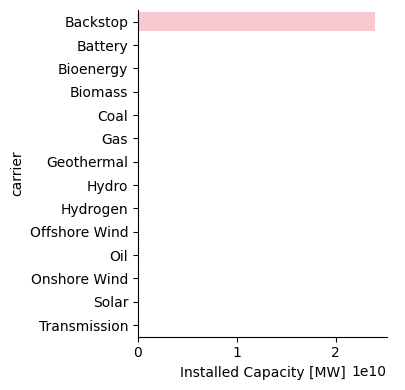

In [53]:
n.statistics.installed_capacity.plot()

In [51]:
n.statistics.energy_balance()

period                                          2023          2035
component   carrier       bus_carrier                             
Generator   Backstop      Transmission           NaN           NaN
            Bioenergy     Transmission           NaN           NaN
            Biomass       Transmission  9.024685e+06  1.201157e+07
            Coal          Transmission  1.578666e+08  3.188003e+08
            Gas           Transmission  6.890628e+07  3.441565e+08
            Geothermal    Transmission  1.766454e+07  1.509516e+07
            Hydro         Transmission  2.537427e+08  3.091608e+08
            Offshore Wind Transmission  9.411772e+06  9.411147e+06
            Oil           Transmission           NaN  1.631092e+04
            Onshore Wind  Transmission  2.778390e+07  2.770336e+07
            Solar         Transmission  1.362401e+07  1.360622e+07
Link        Hydrogen      Hydrogen      3.660000e+03  3.640000e+03
                          Transmission -5.228571e+03 -5.200000e+03
            Transmission  Transmission -2.817750e+06 -2.397040e+06
Load        -             Transmission -5.527006e+08 -1.035270e+09
            Hydrogen      Hydrogen     -3.660000e+03 -3.640000e+03
StorageUnit Battery       Transmission -2.500994e+06 -1.228927e+07

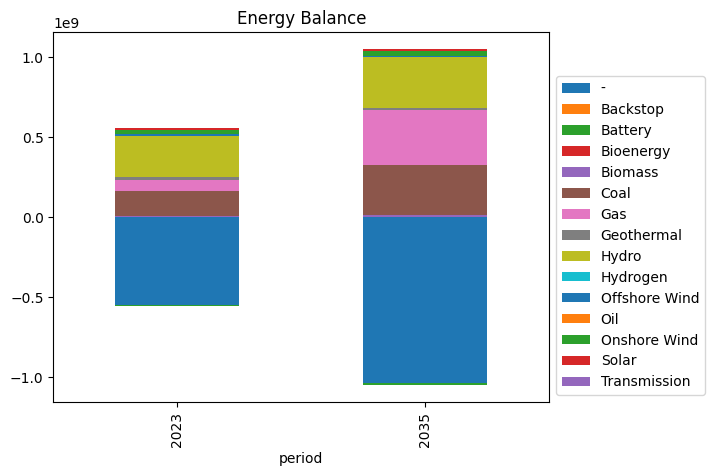

In [ ]:
fig, ax = plt.subplots()

# Group by carrier and sum across components/bus_carrier
n.statistics.energy_balance().groupby("carrier").sum().T.plot(
    kind="bar", stacked=True, ax=ax, title="Energy Balance"
)

# Adjust legend
ax.legend(bbox_to_anchor=(1, 0), loc="lower left", title=None, ncol=1)
plt.show()